In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp /content/kaggle.json  ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
 !kaggle datasets download -d omkargurav/face-mask-dataset

 94% 154M/163M [00:01<00:00, 158MB/s]
100% 163M/163M [00:01<00:00, 145MB/s]


In [4]:
from zipfile import ZipFile
dataset ='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [5]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [7]:
with_mask = os.listdir('/content/data/with_mask')

In [8]:
with_mask[:10]

['with_mask_2906.jpg',
 'with_mask_3631.jpg',
 'with_mask_2065.jpg',
 'with_mask_3185.jpg',
 'with_mask_417.jpg',
 'with_mask_2425.jpg',
 'with_mask_128.jpg',
 'with_mask_2454.jpg',
 'with_mask_3647.jpg',
 'with_mask_2239.jpg']

In [9]:
without_mask = os.listdir('/content/data/without_mask')

In [10]:
without_mask[:5]

['without_mask_3402.jpg',
 'without_mask_651.jpg',
 'without_mask_3235.jpg',
 'without_mask_3611.jpg',
 'without_mask_2759.jpg']

In [11]:
print("The number of with masks :", len(with_mask))
print("The number of without masks :", len(without_mask))

The number of with masks : 3725
The number of without masks : 3828


with mask - 1
without mask - 0

In [12]:
with_mask_labels = [1]*3725
without_mask_labels=[0]*3828

In [13]:
with_mask_labels[:6]

[1, 1, 1, 1, 1, 1]

In [14]:
without_mask_labels[:6]

[0, 0, 0, 0, 0, 0]

In [15]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

In [16]:
import matplotlib.image as mpimg

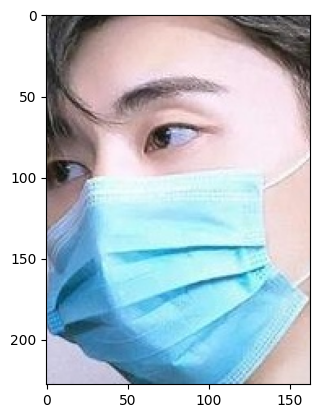

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

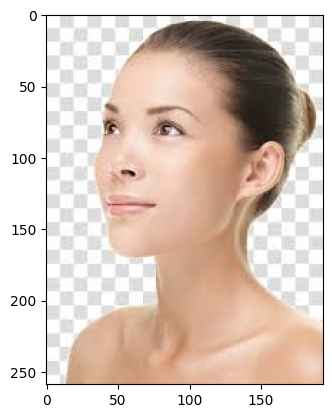

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [25]:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
data[0]

array([[[216, 216, 216],
        [220, 220, 220],
        [227, 227, 227],
        ...,
        [200, 200, 201],
        [196, 196, 199],
        [191, 190, 196]],

       [[218, 218, 218],
        [221, 221, 221],
        [226, 226, 226],
        ...,
        [201, 201, 203],
        [198, 197, 201],
        [193, 192, 198]],

       [[221, 221, 221],
        [223, 223, 223],
        [227, 227, 227],
        ...,
        [202, 202, 204],
        [200, 200, 203],
        [197, 196, 202]],

       ...,

       [[210, 212, 212],
        [158, 147, 146],
        [163, 137, 133],
        ...,
        [ 10,  12,  11],
        [  9,  11,  10],
        [  8,  10,   9]],

       [[213, 215, 215],
        [159, 148, 147],
        [158, 132, 128],
        ...,
        [  9,  11,  10],
        [  9,  11,  10],
        [  8,  10,   9]],

       [[215, 217, 217],
        [160, 149, 148],
        [154, 128, 124],
        ...,
        [  8,  10,   9],
        [  8,  10,   9],
        [  8,  10,   9]]

In [27]:
x = np.array(data)
y= np.array(labels)

In [28]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
x

array([[[[216, 216, 216],
         [220, 220, 220],
         [227, 227, 227],
         ...,
         [200, 200, 201],
         [196, 196, 199],
         [191, 190, 196]],

        [[218, 218, 218],
         [221, 221, 221],
         [226, 226, 226],
         ...,
         [201, 201, 203],
         [198, 197, 201],
         [193, 192, 198]],

        [[221, 221, 221],
         [223, 223, 223],
         [227, 227, 227],
         ...,
         [202, 202, 204],
         [200, 200, 203],
         [197, 196, 202]],

        ...,

        [[210, 212, 212],
         [158, 147, 146],
         [163, 137, 133],
         ...,
         [ 10,  12,  11],
         [  9,  11,  10],
         [  8,  10,   9]],

        [[213, 215, 215],
         [159, 148, 147],
         [158, 132, 128],
         ...,
         [  9,  11,  10],
         [  9,  11,  10],
         [  8,  10,   9]],

        [[215, 217, 217],
         [160, 149, 148],
         [154, 128, 124],
         ...,
         [  8,  10,   9],
        

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2 )

In [31]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [32]:
x_train[0]

array([[[220, 210, 198],
        [218, 208, 196],
        [215, 205, 193],
        ...,
        [254, 253, 251],
        [254, 253, 251],
        [254, 253, 251]],

       [[226, 216, 204],
        [224, 214, 202],
        [220, 210, 198],
        ...,
        [254, 253, 251],
        [254, 253, 251],
        [254, 253, 251]],

       [[234, 224, 213],
        [233, 222, 211],
        [228, 218, 207],
        ...,
        [254, 253, 251],
        [254, 253, 251],
        [254, 253, 251]],

       ...,

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [33]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_classes=2
model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(128,128,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(62, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='sigmoid')

])

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
189/189 [==============================] - 10s 18ms/step - loss: 0.3817 - accuracy: 0.8310
Epoch 2/20
189/189 [==============================] - 3s 16ms/step - loss: 0.2490 - accuracy: 0.9015
Epoch 3/20
189/189 [==============================] - 3s 17ms/step - loss: 0.1870 - accuracy: 0.9282
Epoch 4/20
189/189 [==============================] - 3s 17ms/step - loss: 0.1570 - accuracy: 0.9386
Epoch 5/20
189/189 [==============================] - 3s 16ms/step - loss: 0.1257 - accuracy: 0.9489
Epoch 6/20
189/189 [==============================] - 4s 19ms/step - loss: 0.0975 - accuracy: 0.9656
Epoch 7/20
189/189 [==============================] - 4s 20ms/step - loss: 0.0792 - accuracy: 0.9695
Epoch 8/20
189/189 [==============================] - 4s 21ms/step - loss: 0.0547 - accuracy: 0.9801
Epoch 9/20
189/189 [==============================] - 3s 18ms/step - loss: 0.0652 - accuracy: 0.9765
Epoch 10/20
189/189 [==============================] - 3s 17ms/step - loss: 0.0382 - accur

In [38]:
model.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 1s 10ms/step - loss: 0.4366 - accuracy: 0.9279


[0.4366198182106018, 0.9278623461723328]

PATH OF THE IMAGE TO BE PREDICTED:/content/data/with_mask/with_mask_1668.jpg


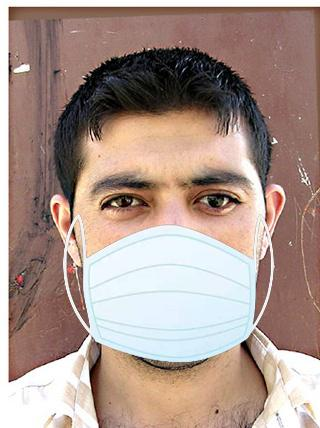

1/1 [==============================] - 0s 24ms/step
1
The person in the image is wearing a mask


In [47]:
input_image_path = input("PATH OF THE IMAGE TO BE PREDICTED:")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_size = cv2.resize(input_image, (128,128))
input_image_resized = input_image_size/255
input_image_reshaped = np.reshape(input_image_resized,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
input_prediction
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')